In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = torch.zeros(20,3)
noise_f1 = torch.zeros(20,3)
ri = np.zeros(20)
r = torch.zeros(1,20)
conc = torch.Tensor([[10,6,3]])
for i in range(20):
    dist = torch.distributions.dirichlet.Dirichlet(conc)
    data[i] = dist.sample()

    noise1 = torch.randint(0,2,(1,3))
    
    while (noise1[0,0]==0 and noise1[0,1]==0 and noise1[0,2]== 0):
        noise1 = torch.randint(0,2,(1,3))
        
            
    noise_f1[i] = noise1.float()

    mu = data[i,0]*noise_f1[i,0]+ data[i,1]*noise_f1[i,1]+ data[i,2]*noise_f1[i,2]
    sig = 0.1*mu
    R = torch.normal(mu, sig, (1,1))
    r[0,i]=R
    #while r[0,i] > 1:
        #r[0,i] = torch.normal(mu, sig, (1,1))

    ri[i] = r[0,i].item()
        
#print(noise_f)
print(r)




tensor([[0.8861, 0.5854, 0.2693, 0.5739, 0.7008, 0.7349, 0.3454, 0.9494, 0.3032,
         0.5157, 0.1240, 0.8163, 0.1249, 0.2513, 0.3468, 0.8658, 0.9519, 0.4730,
         0.9014, 0.1390]])


In [3]:
class discriminator(nn.Module):
    def __init__(self, in_features):
        super().__init__()
        self.disc = nn.Sequential(
            nn.Linear(in_features,64),
            nn.LeakyReLU(.01),
            nn.Linear(64, 1),
            nn.Sigmoid(),
        )

    def forward(self, x):
        return self.disc(x)
    
class generator(nn.Module):
    def __init__(self, n_dim, io_dim):
        super().__init__()
        self.gen = nn.Sequential(
            nn.Linear(n_dim,64),
            nn.LeakyReLU(.01),
            nn.Linear(64, io_dim),
        )

    def forward(self, x):
        return self.gen(x)

n_dim = 3 #noise dimension.
io_dim = 20 #generator output and disc input dimension.
lr = 3e-4
num_epoch = 1000
#num_exp = 1000
#batch = 100

disc = discriminator(io_dim)
gen = generator(n_dim, io_dim)

opt_disc = optim.Adam(disc.parameters(), lr=lr)
opt_gen = optim.Adam(gen.parameters(), lr=lr)
criterion = nn.BCELoss()

fixed = torch.randint(0,2,(1,n_dim))
fixed_noise = fixed.float()

z= np.zeros(num_epoch*io_dim)
#z1= np.zeros(num_epoch)
#z2= np.zeros(num_epoch)

d= np.zeros(io_dim*num_epoch)
d1= np.zeros(io_dim*num_epoch)
d2= np.zeros(io_dim*num_epoch)

for ep in range(1):

    for epoch in range(num_epoch):
        #print(epoch)
        for batch in range(100):

            ##Training discriminator
            #conc = torch.Tensor([[10,6,3]])
            #dist = torch.distributions.dirichlet.Dirichlet(conc)
            #data = dist.sample()

            noise = torch.randint(0,2,(1,n_dim))
            noise_f = noise.float()
            fake = gen(noise_f)
            disc_real = disc(r)
            lossD_real = criterion(disc_real, torch.ones_like(disc_real))
            disc_fake = disc(fake)
            lossD_fake = criterion(disc_fake, torch.zeros_like(disc_fake))
            lossD = (lossD_real + lossD_fake) / 2
            disc.zero_grad()
            lossD.backward(retain_graph=True)
            opt_disc.step()


            ##Training generator
            output = disc(fake)
            lossG = criterion(output, torch.ones_like(output))
            gen.zero_grad()
            lossG.backward()
            opt_gen.step()

        generated_samples = gen(noise_f)

        
        #d[epoch] = noise_f[0,0].item()
        #d1[epoch] = noise_f[0,1].item()
        #d2[epoch] = noise_f[0,2].item()



        for ep1 in range(io_dim):
            z[io_dim*epoch + ep1] = generated_samples[0,ep1].item()
            d[io_dim*epoch + ep1] = noise_f[0,0].item()
            d1[io_dim*epoch + ep1] = noise_f[0,1].item()
            d2[io_dim*epoch + ep1] = noise_f[0,2].item()

        

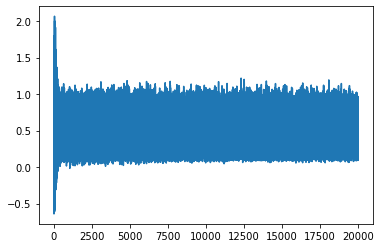

In [4]:
plt.plot(z)

In [5]:

Z = z[4000:len(z)]
len(Z)

16000

In [6]:
index = []
for i in range(len(Z)):
    if(Z[i]<0):
        index.append(i)
    
#print(index2)
print("Length of index is",len(index))



Length of index is 0


In [7]:
Z = np.delete(Z,index)

In [8]:
len(Z)

16000

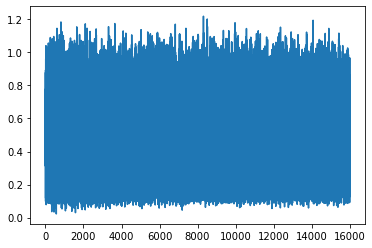

In [9]:
plt.plot(Z)

In [11]:
D = d[4000:len(d)]
D1 = d1[4000:len(d)]
D2 = d2[4000:len(d)]

In [13]:
np.savetxt('r.txt',Z)
np.savetxt('d.txt',D)
np.savetxt('d1.txt',D1)
np.savetxt('d2.txt',D2)


In [12]:
len(D)

16000

In [ ]:
d

In [ ]:
z